# Optic Diseases
https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification/data

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

%autosave 30

Autosaving every 30 seconds


## Dataset Exploration
* Identification of number of samples for each category
* Creation of a unified dataframe, containing paths and respective category

In [23]:
dataPath = r"C:\Users\asuto\Desktop\Work\Eye Diseases\dataset"
os.listdir(dataPath)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [32]:
%%time
total = 0
for disease in os.listdir(dataPath):
    diseasePath = os.path.join(dataPath,disease)
    print(f"Number of samples for {disease} case: {len(os.listdir(diseasePath))}")
    total += len(os.listdir(diseasePath))
print(f"Total samples: {total}")

Number of samples for cataract case: 1038
Number of samples for diabetic_retinopathy case: 1098
Number of samples for glaucoma case: 1007
Number of samples for normal case: 1074
Total samples: 4217
CPU times: total: 46.9 ms
Wall time: 29.3 ms


In [47]:
%%time
diseaseMap = {"filepath":[],"label":[]}

for disease in tqdm(os.listdir(dataPath)):
    diseasePath = os.path.join(dataPath,disease)

    for path in os.listdir(diseasePath):
        diseaseMap['filepath'].append(os.path.join(dataPath,disease,path))
        diseaseMap['label'].append(disease)

opticDf = pd.DataFrame(diseaseMap).sample(frac=1)
opticDf.head()

100%|██████████| 4/4 [00:00<00:00, 32.05it/s]

CPU times: total: 46.9 ms
Wall time: 151 ms


,filepath,label
3734,C:\Users\asuto\Desktop\Work\Eye Diseases\datas...,normal
1221,C:\Users\asuto\Desktop\Work\Eye Diseases\datas...,diabetic_retinopathy
2460,C:\Users\asuto\Desktop\Work\Eye Diseases\datas...,glaucoma
1548,C:\Users\asuto\Desktop\Work\Eye Diseases\datas...,diabetic_retinopathy
2025,C:\Users\asuto\Desktop\Work\Eye Diseases\datas...,diabetic_retinopathy


In [48]:
opticDf.to_csv(r"C:\Users\asuto\Desktop\Work\Eye Diseases\opticDiseasesDataframe.csv",index=False)

## Image Exploration
* Display Images
* Image Preprocessing
* Image Generator


In [106]:
def displayImg(sample,scaleImage = True):
    imgName,label = sample['filepath'].item().split('\\')[-1],sample['label'].item()
    path = sample['filepath'].item()
    img = mpimg.imread(path)

    if scaleImage:
        img = img / 255
        
    plt.figure(figsize= (6,6),dpi=80)
    imgplot = plt.imshow(img)
    plt.title(f"{imgName}:{label}",color= 'blue', fontsize= 12)
    plt.show()
    return img

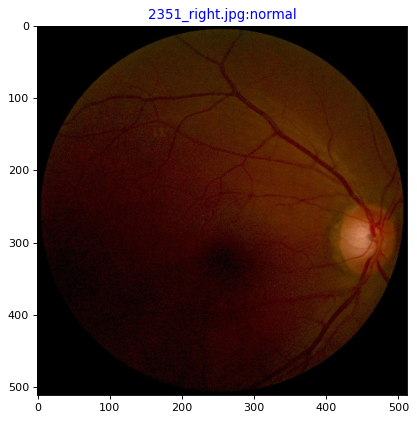

In [107]:
sample = opticDf.sample(1)
img = displayImg(sample)

In [108]:
np.max(img)

0.8470588235294118